In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [16]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [17]:
# converting dataset into time series data
df['datetime'] = pd.to_datetime('01'+ '-' + df['month'].astype(str) + '-' + df['year'].astype(str))
df.set_index('datetime',inplace=True)
df.head()

,year,month,passengers
datetime,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


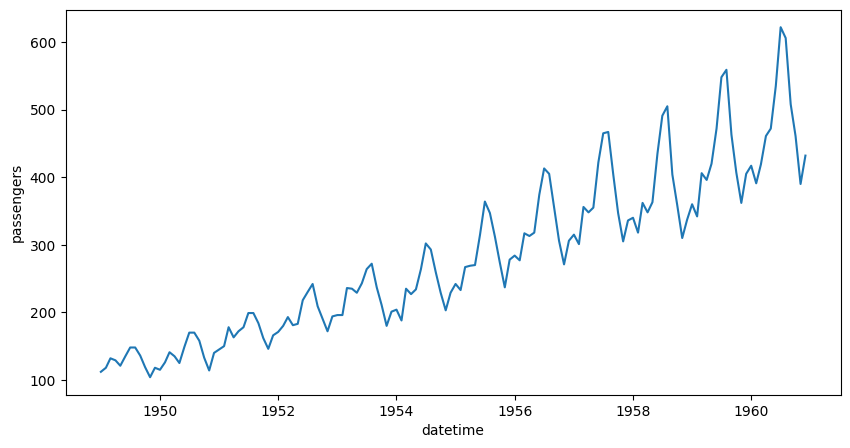

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df, x = df.index, y='passengers')
plt.show()

# here the dataset is tread data as it increasing

#### Now we have to check if the data is stationary or not

### Rolling Statistics

In [28]:
df['rollmean'] = df['passengers'].rolling(window=12).mean()
df['rollstd'] = df['passengers'].rolling(window=12).std()
df.head()

,year,month,passengers,rollmean,rollstd
datetime,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


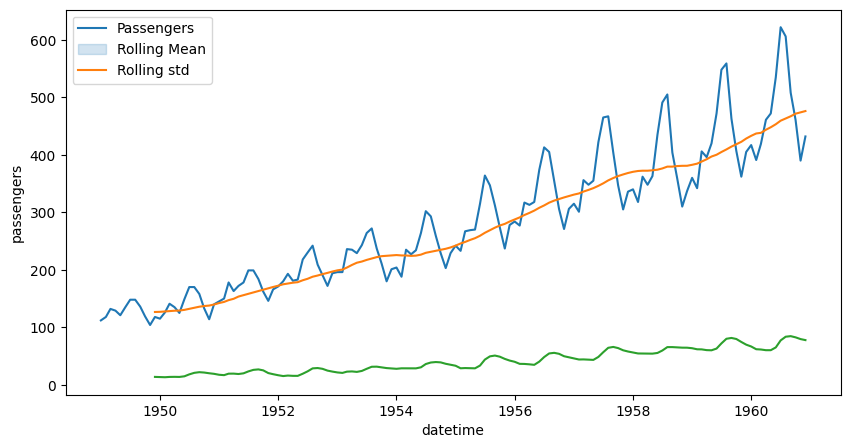

In [39]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)
sns.lineplot(data=df,x=df.index,y=df.rollmean)
sns.lineplot(data=df,x=df.index,y=df.rollstd)
plt.legend(['Passengers','Rolling Mean','Rolling std'])
plt.show()

##### Here Rolling std is approximately stationary but the mean is showing trend pattern and it is increasing by time. That means our data is not stationary

### ADF (Augmented Dickey-Fuller test)
#####  If Test statistics < Critical Values then the data is stationary

In [41]:
from statsmodels.tsa.stattools import adfuller

In [43]:
adf = adfuller(df['passengers'],autolag='AIC')
adf

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [47]:
# These are test statistics
adf[0:4]

(0.8153688792060482, 0.991880243437641, 13, 130)

In [51]:
stats = pd.Series(adf[0:4],index=['Test Statistic','P-value','#lags used', 'Number if observations used'])
stats

Test Statistic                   0.815369
P-value                          0.991880
#lags used                      13.000000
Number if observations used    130.000000
dtype: float64

In [52]:
# These are Critical Values
adf[4]

{'1%': -3.4816817173418295,
 '5%': -2.8840418343195267,
 '10%': -2.578770059171598}

In [53]:
for key, value in adf[4].items():
    print('Criticality', key, ':' , value)

Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


#### Here the critical value is less than test statistics value so clearly the dataset is not stationary